* Investigating the handwritten digits dataset.
* Sample images:
<img src="Mnist.png">

* Please apply the folowing eight methods to classify the handwritten digits dataset.
* Split the dataset into training sets and test sets
* Fit the training data sets to the following eight algorithms
* Print the classification report on the test data sets

<h4>Method 1: KNN</h4>
<h4>Method 2: Linear SVM</h4>
<h4>Method 3: Gaussian Kernel SVM</h4>
<h4>Method 4: Naive Bayes</h4>
<h4>Method 5: Decision Tree</h4>   
<h4>Method 6: Random Forest</h4> 
<h4>Method 7: Voting Classifier</h4> 
<h4>Method 8: Bagging</h4> 

In [1]:
# Importing the dataset
from sklearn.datasets import load_digits
digits = load_digits()
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [3]:
print(digits.keys())
print(digits.DESCR)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

In [4]:
import pandas as pd
df=pd.DataFrame(digits['data'])
print(df)

       0    1     2     3     4     5    6    7    8    9   ...   54   55  \
0     0.0  0.0   5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1     0.0  0.0   0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2     0.0  0.0   0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0   
3     0.0  0.0   7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0   
4     0.0  0.0   0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...   ...  ...   ...   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...   
1792  0.0  0.0   4.0  10.0  13.0   6.0  0.0  0.0  0.0  1.0  ...  4.0  0.0   
1793  0.0  0.0   6.0  16.0  13.0  11.0  1.0  0.0  0.0  0.0  ...  1.0  0.0   
1794  0.0  0.0   1.0  11.0  15.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1795  0.0  0.0   2.0  10.0   7.0   0.0  0.0  0.0  0.0  0.0  ...  2.0  0.0   
1796  0.0  0.0  10.0  14.0   8.0   1.0  0.0  0.0  0.0  2.0  ...  8.0  0.0   

       56   57   58    59    60    61   62   63  
0     0.0  0.0  6.0  13.0

In [5]:
print(digits['images'])
print(digits['images'].shape)

[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5. ... 12.  0.  

0 10
1 100
2 100
3 45


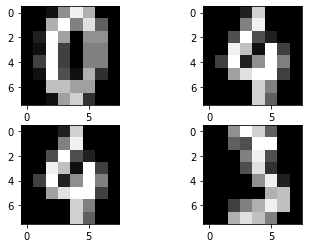

In [9]:
import matplotlib.pyplot as plt
digits.images[0].shape
list = [10,100,100,45]
fig = plt.figure()
for i,img in enumerate(list):
    print(i,img)
    plt.subplot(2,2,i+1)
    plt.imshow(digits.images[img],cmap='gray')

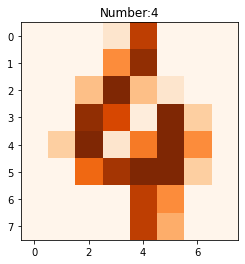

In [10]:
import matplotlib.pyplot as plt
def displayImage(i):
    plt.imshow(digits['images'][i],cmap='Oranges')
    plt.title("Number:"+str(digits['target'][i]))
    plt.show()

displayImage(100)

In [12]:
digits.images.shape

(1797, 8, 8)

In [13]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [15]:
#X=digits['data']
#y=digits['target']
X =  digits.data
y =  digits.target
print(X)
print(y)
print(X.shape)
print(y.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
(1797, 64)
(1797,)


Text(0.5, 1.0, 'Number :3')

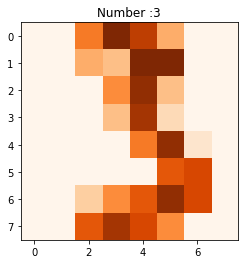

In [16]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[45],cmap='Oranges')
plt.title("Number :"+ str(y[45]))

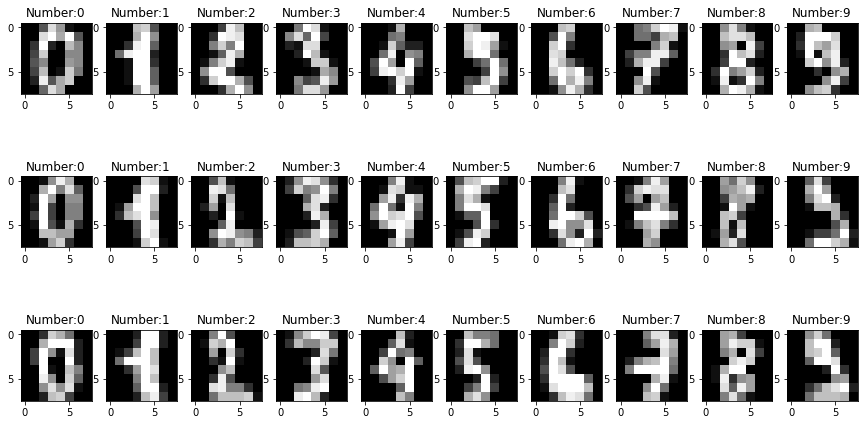

In [17]:
import matplotlib.pyplot as plt
figure,axes=plt.subplots(3,10,figsize=(15,8))
for ax,img,num in zip(axes.ravel(),digits.images,y):
    #print(ax,img,num)
    ax.imshow(img,cmap='gray')
    ax.set_title("Number:"+str(num))

## Step 1. Split the dataset into training data and testing data (<mark>10 points</mark>)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state =0, stratify = y)


In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1198, 64)
(599, 64)
(1198,)
(599,)


## Step 2. Algorithm Analysis (<mark>80 points</mark>)

## Method 1. KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, p = 2)
# Fitting classifier to the Training set
classifier.fit(X_train,y_train)



KNeighborsClassifier(n_neighbors=3)

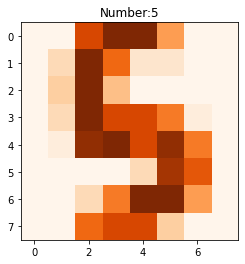

In [22]:
import numpy as np
test=np.array(digits['data'][1776])
test1=test.reshape(1,-1)
displayImage(1776)

In [23]:
# Predicting the 1776 image results
y_pred= classifier.predict(test1)
print(y_pred)

[5]


In [24]:
# Predicting the Test set results
y_pred1 = classifier.predict(X_test)
print(y_pred1)

[2 3 7 0 8 4 3 4 6 5 4 9 8 4 8 9 7 2 7 5 7 7 0 3 7 2 0 5 7 5 5 9 5 4 5 4 9
 6 5 7 8 1 3 0 3 9 9 7 7 8 3 7 7 5 1 0 3 6 6 0 9 5 1 2 1 4 6 2 2 8 3 4 1 5
 8 4 5 1 9 0 7 6 4 6 7 9 8 1 2 9 8 6 0 1 6 7 9 3 5 3 2 0 2 2 8 1 6 1 4 0 8
 4 3 2 6 3 1 9 6 5 5 2 0 5 6 7 1 8 7 4 8 8 1 3 8 2 5 0 3 3 4 8 2 5 1 0 1 8
 3 1 0 7 0 0 3 7 8 1 7 5 8 1 8 8 4 5 2 7 3 5 9 2 5 9 1 4 2 9 9 4 6 8 9 9 8
 8 9 3 4 0 5 2 6 4 9 4 4 6 3 7 3 4 5 3 1 2 6 1 0 6 5 7 5 0 8 0 1 5 7 0 0 3
 3 9 8 4 4 1 1 2 1 7 2 4 6 4 9 1 4 6 0 5 9 3 3 1 9 3 0 1 5 2 3 0 4 9 0 2 3
 1 6 9 4 9 1 8 2 6 7 7 3 8 1 1 2 2 0 8 7 9 7 1 4 7 2 1 4 2 6 0 8 0 1 0 7 0
 5 5 9 8 5 4 8 1 7 1 5 5 8 4 2 9 2 6 6 8 0 2 9 3 8 2 7 1 0 0 5 9 5 0 0 3 7
 0 2 0 8 7 5 1 9 8 6 2 7 4 7 4 2 8 7 1 4 4 4 9 9 6 4 5 3 0 5 9 1 1 9 4 0 3
 0 1 3 4 3 3 5 4 5 5 4 3 9 8 1 1 4 7 2 0 2 1 6 7 4 8 9 3 7 6 8 3 7 0 9 0 9
 5 4 2 2 5 2 4 6 6 4 1 6 2 0 1 1 9 6 5 1 8 0 9 2 6 6 3 8 0 9 6 8 0 3 8 2 8
 2 9 5 6 4 4 4 6 3 6 9 5 2 2 6 8 8 5 3 2 9 3 5 2 0 6 4 7 0 7 2 9 3 7 6 3 5
 6 8 3 6 5 4 3 6 9 6 4 7 

In [25]:
#precision:total number of correct predictions for a given digit divided by total number of predictions for that digit.
#recall:total number of correct predictions for a given digit divided by total number of samples that should have been predicted as that digit
#f1-score:average of prescision and recall
#support:number of samples with given expected value
#F-Measure/f1-score = (2 * Precision * Recall) / (Precision + Recall)
#Precision = TruePositives / (TruePositives + FalsePositives)
#Recall = TruePositives / (TruePositives + FalseNegatives)
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred1)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       0.94      1.00      0.97        61
           2       1.00      1.00      1.00        59
           3       0.95      0.97      0.96        61
           4       1.00      0.98      0.99        60
           5       0.98      1.00      0.99        61
           6       1.00      1.00      1.00        60
           7       0.98      1.00      0.99        60
           8       1.00      0.93      0.96        58
           9       1.00      0.97      0.98        60

    accuracy                           0.98       599
   macro avg       0.99      0.98      0.99       599
weighted avg       0.99      0.98      0.98       599



In [26]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred1)
print(cm)

[[59  0  0  0  0  0  0  0  0  0]
 [ 0 61  0  0  0  0  0  0  0  0]
 [ 0  0 59  0  0  0  0  0  0  0]
 [ 0  0  0 59  0  1  0  1  0  0]
 [ 0  1  0  0 59  0  0  0  0  0]
 [ 0  0  0  0  0 61  0  0  0  0]
 [ 0  0  0  0  0  0 60  0  0  0]
 [ 0  0  0  0  0  0  0 60  0  0]
 [ 0  3  0  1  0  0  0  0 54  0]
 [ 0  0  0  2  0  0  0  0  0 58]]


AxesSubplot(0.125,0.125;0.62x0.755)


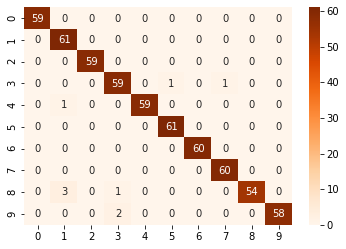

In [27]:
import seaborn as sns
s=sns.heatmap(cm,annot=True,cmap='Oranges')
print(s)


In [28]:
print(' KNN Accuracy: %.4f'%classifier.score(X_test,y_test))
#print(classifier.score(X_test,y_test))

 KNN Accuracy: 0.9850


In [29]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred1)
print('KNN Accuracy: %.4f'%acc)

KNN Accuracy: 0.9850


In [30]:
acc=metrics.balanced_accuracy_score(y_test,y_pred1)
print('KNN Balanced Accuracy: %.4f'%acc)

KNN Balanced Accuracy: 0.9848


## Method 2. Linear SVM

In [31]:
from sklearn import svm
linear_model=svm.SVC(kernel='linear')
linear_model.fit(X_train,y_train)

SVC(kernel='linear')

In [32]:
y_pred2=linear_model.predict(X_test)
print(y_pred2)

[2 3 7 0 9 4 5 4 6 5 4 9 8 4 8 9 7 2 7 5 7 7 0 3 7 2 0 5 7 5 5 9 5 4 5 4 9
 6 5 7 8 1 3 0 3 9 9 7 7 8 3 7 7 5 1 0 3 6 6 0 9 5 1 2 1 4 6 2 2 8 3 4 1 5
 8 4 5 1 9 0 7 6 4 6 7 9 8 1 2 9 8 6 0 1 6 7 9 3 5 3 2 0 2 2 8 1 6 1 4 0 8
 4 3 2 6 3 1 9 6 5 5 2 0 5 6 7 1 8 7 4 8 8 1 3 8 2 5 0 3 3 4 8 2 5 1 0 1 8
 3 1 0 7 0 0 3 7 8 1 7 5 8 1 5 1 4 5 2 7 3 5 9 2 5 9 1 4 2 9 9 4 6 8 9 9 8
 8 9 3 4 0 5 2 6 4 9 4 4 6 3 7 3 4 5 9 1 2 6 1 0 6 5 7 5 0 8 0 1 5 7 0 0 3
 3 9 8 4 4 1 1 2 1 7 2 4 6 4 9 1 4 6 0 5 9 3 3 1 9 3 0 1 5 2 3 0 4 9 0 2 3
 1 6 9 4 9 1 8 2 6 7 7 3 8 1 1 2 2 0 8 7 9 7 1 4 7 2 1 4 2 6 0 8 0 1 0 7 0
 5 5 9 8 5 4 8 1 7 1 5 5 8 4 2 9 2 6 6 1 0 2 9 3 8 2 7 1 0 0 5 9 5 0 0 3 7
 0 2 0 8 7 5 1 9 8 6 2 7 4 7 4 2 8 7 1 4 4 4 9 9 6 4 5 3 0 5 9 1 1 9 4 0 3
 0 1 3 4 3 3 5 4 5 5 4 3 9 8 1 1 4 7 2 0 2 8 6 7 4 8 9 3 7 6 8 3 7 0 9 0 9
 5 4 2 2 5 2 4 6 6 4 1 6 2 0 1 1 9 6 5 1 8 0 9 2 6 1 3 8 0 9 6 8 0 9 8 2 8
 2 9 5 6 4 4 4 6 3 6 9 5 2 2 6 8 8 3 3 2 9 3 5 2 0 6 4 7 0 7 2 9 3 7 6 3 5
 6 8 3 6 5 4 3 6 9 6 4 7 

In [33]:
print('Linear SVM Accuracy: %.4f'%linear_model.score(X_test,y_test))

Linear SVM Accuracy: 0.9800


In [34]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred2)
print('Linear SVM Accuracy: %.4f'%acc)

Linear SVM Accuracy: 0.9800


In [35]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred2)
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        59
           1       0.94      1.00      0.97        61
           2       1.00      1.00      1.00        59
           3       0.98      0.97      0.98        61
           4       1.00      1.00      1.00        60
           5       0.95      1.00      0.98        61
           6       1.00      0.97      0.98        60
           7       0.98      1.00      0.99        60
           8       1.00      0.90      0.95        58
           9       0.97      0.97      0.97        60

    accuracy                           0.98       599
   macro avg       0.98      0.98      0.98       599
weighted avg       0.98      0.98      0.98       599



## Method 3. Gaussian Kernal SVM

In [36]:
from sklearn import svm
kernal_rbf=svm.SVC(kernel='rbf',degree=3,gamma='scale')
kernal_rbf.fit(X_train,y_train)

SVC()

In [37]:
y_pred3=kernal_rbf.predict(X_test)
print(y_pred3)

[2 3 7 0 8 4 8 4 6 5 4 9 8 4 8 9 7 2 7 5 7 7 0 3 7 2 0 5 7 5 5 9 5 4 5 4 9
 6 5 7 8 1 3 0 3 9 9 7 7 8 3 7 7 5 1 0 3 6 6 0 9 5 1 2 1 4 6 2 2 8 3 4 1 5
 8 4 5 1 9 0 7 6 4 6 7 9 8 1 2 9 8 6 0 1 6 7 9 3 5 3 2 0 2 2 8 1 6 1 4 0 8
 4 3 2 6 3 1 9 6 5 5 2 0 5 6 7 1 8 7 4 8 8 1 3 8 2 5 4 9 3 4 8 2 5 1 0 1 8
 3 1 0 7 0 0 3 7 8 1 7 5 8 1 8 8 4 5 2 7 3 5 9 2 5 9 1 8 2 9 9 4 6 8 9 9 8
 8 9 3 4 0 5 2 6 4 9 4 4 6 3 7 3 4 5 3 1 2 6 1 0 6 5 7 5 0 8 0 1 5 7 0 0 3
 3 9 8 8 4 1 1 2 1 7 2 4 6 4 9 1 4 6 0 5 9 3 3 1 9 3 0 1 5 2 3 0 4 9 0 2 3
 1 6 9 4 9 1 8 2 6 7 7 3 8 1 1 2 2 0 8 7 9 7 1 4 7 2 1 4 2 6 0 8 0 1 0 7 0
 5 5 9 8 5 4 8 1 7 1 5 5 8 4 2 9 2 6 6 1 0 2 9 3 8 2 7 1 0 0 5 9 5 0 0 3 7
 0 2 0 8 7 5 1 9 8 6 2 7 4 7 4 2 8 7 1 4 4 4 9 9 6 4 5 3 0 5 9 1 1 9 4 0 3
 0 1 3 4 3 3 5 4 5 5 4 3 9 8 1 1 4 7 2 0 2 1 6 7 4 8 9 3 7 6 8 3 7 0 9 0 9
 5 4 2 2 5 2 4 6 6 4 1 6 2 0 1 1 9 6 5 1 8 0 9 2 6 6 3 8 0 9 6 8 0 9 8 2 8
 2 9 5 6 4 4 4 6 3 6 9 5 2 2 6 8 8 5 3 2 9 3 5 2 0 6 4 7 0 7 2 9 3 7 6 3 5
 6 8 3 6 5 4 3 6 9 6 4 7 

In [38]:
print('Gaussian Kernal SVM Accuracy: %.4f'%kernal_rbf.score(X_test,y_test))

Gaussian Kernal SVM Accuracy: 0.9833


In [39]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred3)
print('Gaussian Kernal SVM Accuracy: %.4f'%acc)

Gaussian Kernal SVM Accuracy: 0.9833


In [40]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred3)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.94      1.00      0.97        61
           2       1.00      1.00      1.00        59
           3       1.00      0.97      0.98        61
           4       0.98      0.97      0.97        60
           5       0.97      1.00      0.98        61
           6       1.00      1.00      1.00        60
           7       0.98      1.00      0.99        60
           8       0.96      0.93      0.95        58
           9       1.00      0.98      0.99        60

    accuracy                           0.98       599
   macro avg       0.98      0.98      0.98       599
weighted avg       0.98      0.98      0.98       599



## Method 4. Naive Bayes

In [41]:
from sklearn import naive_bayes
nb_clf =naive_bayes.GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB()

In [42]:
# Predicting the Test set results
y_pred4 = nb_clf.predict(X_test)
print(y_pred4)

[2 8 7 0 8 4 8 4 6 5 4 9 8 4 8 9 7 1 7 5 7 7 0 3 7 8 0 5 7 9 5 9 5 4 5 4 9
 6 5 7 8 1 2 4 3 9 9 7 7 8 3 7 7 5 1 0 3 6 6 0 8 5 1 8 1 4 6 2 8 8 8 4 1 5
 8 4 5 1 9 0 7 6 4 6 7 7 8 1 2 8 8 6 0 1 6 7 8 3 9 3 2 0 8 2 8 8 6 8 4 0 8
 4 3 2 6 8 8 9 6 5 5 2 0 5 6 7 1 8 7 4 8 8 1 8 8 2 5 8 3 3 7 8 2 5 8 0 1 8
 3 1 0 7 0 0 1 7 8 1 7 5 8 1 8 1 4 5 2 7 3 5 8 8 3 9 8 8 8 9 9 4 6 8 9 9 8
 8 9 3 4 0 5 1 6 4 8 4 4 6 8 7 3 4 5 8 1 8 6 1 0 6 5 7 5 0 8 0 1 5 7 0 0 3
 3 9 8 8 4 8 1 2 8 7 8 4 6 4 9 1 4 6 0 5 4 3 7 1 7 3 0 8 5 8 3 0 4 0 0 8 3
 1 6 9 4 9 1 8 1 6 7 7 3 8 1 1 1 2 0 8 7 9 7 8 4 7 8 8 4 1 6 0 8 0 1 0 7 0
 5 5 9 8 5 4 7 1 7 1 5 5 8 4 8 9 8 6 6 1 0 8 9 8 8 2 7 1 0 0 5 8 5 0 0 3 7
 0 2 0 8 7 8 1 9 8 6 8 7 4 7 4 2 8 7 1 5 4 4 1 9 6 4 5 3 0 7 9 1 1 9 4 0 1
 0 1 3 4 3 8 5 4 5 5 4 3 3 8 2 1 4 7 2 0 2 1 6 7 4 8 6 3 7 6 8 8 7 0 9 4 9
 8 4 2 2 5 2 4 6 6 4 1 6 2 0 1 1 1 6 5 1 8 0 8 2 6 6 3 8 0 9 6 8 0 9 8 8 8
 3 8 5 6 4 4 4 6 3 6 8 5 2 8 6 8 8 8 3 2 9 3 5 2 0 6 7 7 0 7 8 9 3 7 6 3 5
 6 8 7 5 7 4 3 6 9 6 4 7 

In [43]:
print('Naive Bayes Accuracy: %.4f'%nb_clf.score(X_test,y_test))

Naive Bayes Accuracy: 0.8230


In [44]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred4)
print('Naive Bayes Accuracy: %.4f'%acc)

Naive Bayes Accuracy: 0.8230


In [45]:
report = classification_report(y_test, y_pred4)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        59
           1       0.79      0.82      0.81        61
           2       0.94      0.53      0.67        59
           3       0.91      0.64      0.75        61
           4       0.93      0.88      0.91        60
           5       0.95      0.87      0.91        61
           6       0.98      0.97      0.97        60
           7       0.83      1.00      0.91        60
           8       0.46      0.93      0.62        58
           9       0.93      0.65      0.76        60

    accuracy                           0.82       599
   macro avg       0.87      0.82      0.83       599
weighted avg       0.87      0.82      0.83       599



## Method 5. Decision Tree

In [46]:
from sklearn import tree
clf_dt =tree.DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
# Predicting the Test set results
y_pred5 = clf_dt.predict(X_test)
print(y_pred5)

[2 3 7 0 8 4 8 8 6 5 4 9 8 4 8 9 7 8 9 5 7 7 0 3 7 2 0 5 7 5 5 9 5 4 5 4 9
 6 5 7 8 8 3 6 3 8 9 7 7 8 3 7 7 5 1 0 3 6 6 0 8 5 1 2 3 4 6 2 2 8 3 4 2 5
 8 4 5 1 9 0 7 6 4 6 7 7 8 1 2 9 5 6 0 1 6 7 9 3 5 9 2 0 2 1 8 1 6 8 4 0 8
 4 3 2 6 3 1 9 6 5 5 2 0 5 6 7 4 1 7 8 8 8 1 3 8 2 5 2 3 3 4 8 2 5 8 0 1 8
 3 1 0 7 0 0 3 7 8 1 7 5 8 1 8 8 4 5 2 3 8 5 9 2 9 9 1 9 1 9 9 4 3 8 9 9 1
 8 9 3 4 0 5 2 6 4 9 4 4 6 3 7 3 4 5 9 1 2 6 1 0 6 3 7 5 0 9 0 1 5 7 0 0 3
 3 9 8 4 4 8 1 2 1 7 2 4 6 4 9 1 4 6 0 5 9 3 7 1 7 3 0 1 5 2 3 0 4 9 0 2 3
 1 6 9 4 9 1 8 2 6 7 7 3 8 2 2 9 2 0 8 7 1 7 1 4 7 2 8 4 2 6 0 8 0 1 0 7 0
 5 5 8 8 5 4 7 1 7 4 5 5 8 4 2 9 2 6 6 8 0 2 9 8 8 2 7 9 0 0 5 3 5 0 0 3 7
 0 2 0 8 7 5 8 9 8 6 2 7 4 7 4 2 8 7 1 4 5 4 7 9 6 4 5 3 0 5 9 1 1 9 8 0 7
 0 1 8 4 3 8 5 4 5 5 4 3 9 8 2 8 4 7 2 0 2 8 6 4 4 8 8 3 7 6 8 8 7 0 9 8 9
 8 4 2 2 5 2 4 6 6 0 1 6 2 0 1 1 1 6 5 1 8 0 9 7 6 3 3 9 0 9 6 8 0 9 8 8 8
 2 9 3 6 6 4 4 6 3 6 3 5 2 2 6 8 8 7 3 2 9 3 5 2 0 6 2 7 0 4 2 9 3 7 6 3 5
 4 8 7 6 5 6 3 6 9 6 6 7 

In [48]:
print('Decision Tree Accuracy: %.4f'%clf_dt.score(X_test,y_test))

Decision Tree Accuracy: 0.8481


In [49]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred5)
print('Decision Tree Accuracy: %.4f'%acc)

Decision Tree Accuracy: 0.8481


In [50]:
report = classification_report(y_test, y_pred5)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        59
           1       0.85      0.72      0.78        61
           2       0.88      0.86      0.87        59
           3       0.84      0.75      0.79        61
           4       0.88      0.82      0.84        60
           5       0.89      0.93      0.91        61
           6       0.90      0.92      0.91        60
           7       0.86      0.92      0.89        60
           8       0.65      0.86      0.74        58
           9       0.82      0.75      0.78        60

    accuracy                           0.85       599
   macro avg       0.85      0.85      0.85       599
weighted avg       0.85      0.85      0.85       599



## Method 6. Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 300)
rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=300)

In [52]:
# Predicting the Test set results
y_pred6= rf.predict(X_test)
print(y_pred6)

[2 3 7 0 8 4 3 4 6 5 4 9 8 4 8 9 7 2 7 5 7 7 0 3 7 2 0 5 7 5 5 9 5 4 5 4 9
 6 5 7 8 1 3 4 3 9 9 7 7 8 3 7 7 5 1 0 3 6 6 0 9 5 1 2 1 4 6 2 2 8 3 4 1 5
 8 4 5 1 9 0 7 6 4 6 7 9 8 1 2 9 8 6 0 1 6 7 9 3 5 3 2 0 2 2 8 1 6 1 4 0 8
 4 3 2 6 3 1 9 6 5 5 2 0 5 6 7 1 8 7 4 8 8 1 3 8 2 5 4 9 3 4 8 2 5 1 0 1 8
 3 1 0 7 0 0 3 7 8 1 7 5 8 1 8 8 4 5 2 7 3 5 9 2 5 9 1 8 2 9 9 4 6 8 9 9 8
 8 9 3 4 0 5 2 6 4 9 4 4 6 3 7 3 4 5 3 1 2 6 1 0 6 5 7 5 0 8 0 1 5 7 0 0 3
 3 9 8 7 4 1 1 2 1 7 2 4 6 4 9 1 4 6 0 5 9 3 7 1 9 3 0 1 5 2 3 0 4 9 0 2 3
 1 6 9 4 9 1 8 2 6 7 7 3 8 1 1 2 2 0 8 7 9 7 1 4 7 2 1 4 2 6 0 8 0 1 0 7 0
 5 5 9 8 5 4 7 1 7 1 5 5 8 4 2 9 2 6 6 8 0 2 9 3 8 2 7 1 0 0 5 3 5 0 0 3 7
 0 2 0 8 7 5 1 9 8 6 2 7 4 7 4 2 8 7 1 4 4 4 9 9 6 4 5 3 0 5 9 1 1 9 4 0 3
 0 1 3 4 3 3 5 4 5 5 4 3 9 8 1 1 4 7 2 0 2 1 6 7 4 8 9 3 7 6 8 3 7 0 9 0 9
 5 4 2 2 5 2 4 6 6 4 1 6 2 0 1 1 1 6 5 1 8 0 9 2 6 6 3 8 0 9 6 8 0 9 8 2 8
 2 9 5 6 4 4 4 6 3 6 9 5 2 2 6 8 8 3 3 2 9 3 5 2 0 6 4 7 0 7 2 9 3 7 6 3 5
 6 8 7 6 5 4 3 6 9 6 4 7 

In [53]:
print('Random Forest Accuracy: %.4f'%rf.score(X_test,y_test))

Random Forest Accuracy: 0.9750


In [54]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred6)
print('Random Forest Accuracy: %.4f'%acc)

Random Forest Accuracy: 0.9750


In [55]:
report = classification_report(y_test, y_pred6)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        59
           1       0.95      1.00      0.98        61
           2       1.00      1.00      1.00        59
           3       0.97      0.95      0.96        61
           4       0.97      0.97      0.97        60
           5       0.97      1.00      0.98        61
           6       1.00      0.98      0.99        60
           7       0.92      1.00      0.96        60
           8       0.98      0.93      0.96        58
           9       1.00      0.95      0.97        60

    accuracy                           0.97       599
   macro avg       0.98      0.97      0.97       599
weighted avg       0.98      0.97      0.97       599



## Method 7. Voting Classifier

In [56]:
from sklearn.ensemble import VotingClassifier

In [57]:
# Instantiate individual classifiers
from sklearn import neighbors,svm,naive_bayes,tree,ensemble
SEED = 1
rf = ensemble.RandomForestClassifier(n_estimators = 300)
knn =neighbors.KNeighborsClassifier(n_neighbors = 3, p = 2)
dt = tree.DecisionTreeClassifier(random_state = SEED)
nb = naive_bayes.GaussianNB()
kernal_rbf = svm.SVC(kernel='rbf')
kernal_poly = svm.SVC(kernel='poly',degree=3)
linear_svm = svm.SVC(kernel='linear')

#Define a list called classifier that contains
#the tuples (classifier_name, classifier)
classifiers = [('Random Forest',rf),
               ('K Nearest Neighbours',knn),
               ('Classification Tree',dt),
               ('Naive',nb),
               ('RBF',kernal_rbf),
               ('POLY',kernal_poly),
               ('SVM',linear_svm)]

#Instantiate a VotingClassifier 'vc'
vc = VotingClassifier(estimators=classifiers)
#Fit 'vc' to the train set
vc.fit(X_train,y_train)
#Predict test set labels
y_pred7 = vc.predict(X_test)
print(y_pred7)

[2 3 7 0 8 4 8 4 6 5 4 9 8 4 8 9 7 2 7 5 7 7 0 3 7 2 0 5 7 5 5 9 5 4 5 4 9
 6 5 7 8 1 3 0 3 9 9 7 7 8 3 7 7 5 1 0 3 6 6 0 9 5 1 2 1 4 6 2 2 8 3 4 1 5
 8 4 5 1 9 0 7 6 4 6 7 9 8 1 2 9 8 6 0 1 6 7 9 3 5 3 2 0 2 2 8 1 6 1 4 0 8
 4 3 2 6 3 1 9 6 5 5 2 0 5 6 7 1 8 7 4 8 8 1 3 8 2 5 4 3 3 4 8 2 5 1 0 1 8
 3 1 0 7 0 0 3 7 8 1 7 5 8 1 8 8 4 5 2 7 3 5 9 2 5 9 1 4 2 9 9 4 6 8 9 9 8
 8 9 3 4 0 5 2 6 4 9 4 4 6 3 7 3 4 5 3 1 2 6 1 0 6 5 7 5 0 8 0 1 5 7 0 0 3
 3 9 8 4 4 1 1 2 1 7 2 4 6 4 9 1 4 6 0 5 9 3 3 1 9 3 0 1 5 2 3 0 4 9 0 2 3
 1 6 9 4 9 1 8 2 6 7 7 3 8 1 1 2 2 0 8 7 9 7 1 4 7 2 1 4 2 6 0 8 0 1 0 7 0
 5 5 9 8 5 4 8 1 7 1 5 5 8 4 2 9 2 6 6 1 0 2 9 3 8 2 7 1 0 0 5 9 5 0 0 3 7
 0 2 0 8 7 5 1 9 8 6 2 7 4 7 4 2 8 7 1 4 4 4 9 9 6 4 5 3 0 5 9 1 1 9 4 0 3
 0 1 3 4 3 3 5 4 5 5 4 3 9 8 1 1 4 7 2 0 2 1 6 7 4 8 9 3 7 6 8 3 7 0 9 0 9
 5 4 2 2 5 2 4 6 6 4 1 6 2 0 1 1 9 6 5 1 8 0 9 2 6 6 3 8 0 9 6 8 0 9 8 2 8
 2 9 5 6 4 4 4 6 3 6 9 5 2 2 6 8 8 5 3 2 9 3 5 2 0 6 4 7 0 7 2 9 3 7 6 3 5
 6 8 3 6 5 4 3 6 9 6 4 7 

In [58]:
print('Voting Classifier Accuracy: %.4f'%vc.score(X_test,y_test))

Voting Classifier Accuracy: 0.9866


In [59]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred7)
print('Voting Classifier Accuracy: %.4f'%acc)

Voting Classifier Accuracy: 0.9866


In [60]:
report = classification_report(y_test, y_pred7)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.95      1.00      0.98        61
           2       1.00      1.00      1.00        59
           3       0.98      0.97      0.98        61
           4       0.98      1.00      0.99        60
           5       0.97      1.00      0.98        61
           6       1.00      1.00      1.00        60
           7       0.98      1.00      0.99        60
           8       1.00      0.95      0.97        58
           9       1.00      0.97      0.98        60

    accuracy                           0.99       599
   macro avg       0.99      0.99      0.99       599
weighted avg       0.99      0.99      0.99       599



## Method 8. Bagging

In [61]:
from sklearn.ensemble import BaggingClassifier
from sklearn import neighbors
# Instantiate a classifier KNN
knn = neighbors.KNeighborsClassifier(n_neighbors = 3, p = 2)
# Instantiate a BaggingClassifier 'bc'
bc = BaggingClassifier(base_estimator=knn, n_estimators = 100,
                       n_jobs=-1)

In [62]:
#Fit 'bc' to the train set
bc.fit(X_train,y_train)
#Predict test set labels
y_pred8 = bc.predict(X_test)
print(y_pred8)

[2 3 7 0 8 4 3 4 6 5 4 9 8 4 8 9 7 2 7 5 7 7 0 3 7 2 0 5 7 5 5 9 5 4 5 4 9
 6 5 7 8 1 3 0 3 9 9 7 7 8 3 7 7 5 1 0 3 6 6 0 9 5 1 2 1 4 6 2 2 8 3 4 1 5
 8 4 5 1 9 0 7 6 4 6 7 9 8 1 2 9 8 6 0 1 6 7 9 3 5 3 2 0 2 2 8 1 6 1 4 0 8
 4 3 2 6 3 1 9 6 5 5 2 0 5 6 7 1 8 7 4 8 8 1 3 8 2 5 0 3 3 4 8 2 5 1 0 1 8
 3 1 0 7 0 0 3 7 8 1 7 5 8 1 8 8 4 5 2 7 3 5 9 2 5 9 1 4 2 9 9 4 6 8 9 9 8
 8 9 3 4 0 5 2 6 4 9 4 4 6 3 7 3 4 5 3 1 2 6 1 0 6 5 7 5 0 8 0 1 5 7 0 0 3
 3 9 8 4 4 1 1 2 1 7 2 4 6 4 9 1 4 6 0 5 9 3 3 1 9 3 0 1 5 2 3 0 4 9 0 2 3
 1 6 9 4 9 1 8 2 6 7 7 3 8 1 1 2 2 0 8 7 9 7 1 4 7 2 1 4 2 6 0 8 0 1 0 7 0
 5 5 9 8 5 4 8 1 7 1 5 5 8 4 2 9 2 6 6 8 0 2 9 3 8 2 7 1 0 0 5 9 5 0 0 3 7
 0 2 0 8 7 5 1 9 8 6 2 7 4 7 4 2 8 7 1 4 4 4 9 9 6 4 5 3 0 5 9 1 1 9 4 0 3
 0 1 3 4 3 3 5 4 5 5 4 3 9 8 1 1 4 7 2 0 2 1 6 7 4 8 9 3 7 6 8 3 7 0 9 0 9
 5 4 2 2 5 2 4 6 6 4 1 6 2 0 1 1 9 6 5 1 8 0 9 2 6 6 3 8 0 9 6 8 0 3 8 2 8
 2 9 5 6 4 4 4 6 3 6 9 5 2 2 6 8 8 5 3 2 9 3 5 2 0 6 4 7 0 7 2 9 3 7 6 3 5
 6 8 3 6 5 4 3 6 9 6 4 7 

In [63]:
print('Bagging Accuracy: %.4f'%bc.score(X_test,y_test))

Bagging Accuracy: 0.9883


In [64]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred8)
print('Bagging Accuracy: %.4f'%acc)

Bagging Accuracy: 0.9883


In [65]:
report = classification_report(y_test, y_pred8)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       0.97      1.00      0.98        61
           2       1.00      1.00      1.00        59
           3       0.95      0.97      0.96        61
           4       1.00      1.00      1.00        60
           5       0.98      1.00      0.99        61
           6       1.00      1.00      1.00        60
           7       0.98      1.00      0.99        60
           8       1.00      0.95      0.97        58
           9       1.00      0.97      0.98        60

    accuracy                           0.99       599
   macro avg       0.99      0.99      0.99       599
weighted avg       0.99      0.99      0.99       599



## Step 3: Accuracy Results Table 

<table>
    <thead>
        <tr>
            <th></th>
            <th>KNN</th>
            <th>L_SVM</th>
            <th>RBF_SVM</th>
            <th>NB</th>
            <th>DT</th>
            <th>RF</th>
            <th>Voting</th>
            <th>Bagging</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Accuracy</td>
            <td> 0.9850 </td>
            <td> 0.9800 </td>
            <td> 0.9833 </td>
            <td> 0.8230 </td>
            <td> 0.8230 </td>
            <td> 0.9699 </td>
            <td> 0.9866 </td>
            <td> 0.9866 </td>
        </tr>
        <tr>
            <td>Weighted Precision</td>
            <td> 0.99 </td>
            <td> 0.98 </td>
            <td> 0.98 </td>
            <td> 0.87 </td>
            <td> 0.84 </td>
            <td> 0.97 </td>
            <td> 0.99 </td>
            <td> 0.99 </td>
        </tr>
        <tr>
            <td>Weighted Recall</td>
            <td> 0.98 </td>
            <td> 0.98 </td>
            <td> 0.98 </td>
            <td> 0.82 </td>
            <td> 0.84 </td>
            <td> 0.97 </td>
            <td> 0.99 </td>
            <td> 0.99 </td>
        </tr>
    </tbody>
</table>

## Step 4: Conclusion

In [66]:
Accuracy: (True Positive + True Negative) / Total Population
Accuracy is a ratio of correctly predicted observation to the total observations.
Accuracy is the most intuitive performance measure.
True Positive: The number of correct predictions that the occurrence is positive
True Negative: The number of correct predictions that the occurrence is negative

SyntaxError: invalid syntax (<ipython-input-66-8642b7b1aac4>, line 1)

In [ ]:
F1-Score: (2 x Precision x Recall) / (Precision + Recall)
F1-Score is the weighted average of Precision and Recall used in all types of classification algorithms. Therefore, this score takes both false positives and false negatives into account.
F1-Score is usually more useful than accuracy, especially if you have an uneven class distribution.
Precision: When a positive value is predicted, how often is the prediction correct?
Recall: When the actual value is positive, how often is the prediction correct?

In [ ]:
precision:total number of correct predictions for a given digit divided by total number of predictions for that digit.
recall:total number of correct predictions for a given digit divided by total number of samples that should have been predicted as that digit
f1-score:average of prescision and recall
support:number of samples with given expected value
F-Measure/f1-score = (2 * Precision * Recall) / (Precision + Recall)
Precision = TruePositives / (TruePositives + FalsePositives)
Recall = TruePositives / (TruePositives + FalseNegatives)

In [ ]:
 The Voting and Bagging classifiers are best compared to other classifiers to predict handwritten digital images based on accuracy

In [ ]:
After Voting and Bagging Classifiers KNN classifier is best to predict handwritten digits images

In [ ]:
The Decision Tree and Navies Bayes Clasification models have least accuracy and their prediction accuracy is least comparted to other classifiers